In [1]:
%pip install pynput

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [2]:
%pip install ruamel

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [3]:
%pip install cvzone

The filename, directory name, or volume label syntax is incorrect.

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install HandTrackingModule

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [5]:
%pip install Controller

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector

In [2]:
from time import sleep
import numpy as np
import cvzone
#import Controller
from pynput.keyboard import Controller
#from pynput.keyboard import Controller

In [3]:
cap = cv2.VideoCapture(0)
#cap=cv2.flip(cap,1)
cap.set(3, 1280)
cap.set(4, 720)

detector = HandDetector(detectionCon=0.8)
keys = [["Q", "W", "E", "R", "T", "Y", "U", "I", "O", "P"],
        ["A", "S", "D", "F", "G", "H", "J", "K", "L", ";"],
        ["Z", "X", "C", "V", "B", "N", "M", ",", ".", "/"]]
finalText = ""

keyboard = Controller()

In [4]:
def drawAll(img, buttonList):
    for button in buttonList:
        x, y = button.pos
        w, h = button.size
        cvzone.cornerRect(img, (button.pos[0], button.pos[1], button.size[0], button.size[1]),
                          20, rt=0)
        cv2.rectangle(img, button.pos, (x + w, y + h), (255, 0, 255), cv2.FILLED)
        cv2.putText(img, button.text, (x + 20, y + 65),
                    cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 4)
    return img

In [5]:
class Button():
    def __init__(self, pos, text, size=[85, 85]):
        self.pos = pos
        self.size = size
        self.text = text


In [6]:
buttonList = []
for i in range(len(keys)):
    for j, key in enumerate(keys[i]):
        buttonList.append(Button([100 * j + 50, 100 * i + 50], key))

In [7]:
while True:
    success, img = cap.read()
    img = detector.findHands(img)
    lmList, bboxInfo = detector.findPosition(img)
    img = drawAll(img, buttonList)

    if lmList:
        for button in buttonList:
            x, y = button.pos
            w, h = button.size

            if x < lmList[8][0] < x + w and y < lmList[8][1] < y + h:
                cv2.rectangle(img, (x - 5, y - 5), (x + w + 5, y + h + 5), (175, 0, 175), cv2.FILLED)
                cv2.putText(img, button.text, (x + 20, y + 65),
                            cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 4)
                l, _, _ = detector.findDistance(8, 12, img, draw=False)
                print(l)

                ## when clicked
                if l < 30:
                    keyboard.press(button.text)
                    cv2.rectangle(img, button.pos, (x + w, y + h), (0, 255, 0), cv2.FILLED)
                    cv2.putText(img, button.text, (x + 20, y + 65),
                                cv2.FONT_HERSHEY_PLAIN, 4, (255, 255, 255), 4)
                    finalText += button.text
                    sleep(0.15)

    cv2.rectangle(img, (50, 350), (700, 450), (175, 0, 175), cv2.FILLED)
    cv2.putText(img, finalText, (60, 430),
                cv2.FONT_HERSHEY_PLAIN, 5, (255, 255, 255), 5)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

48.76474136094643
54.12947441089744
53.71219600798314
45.17742799230607
48.76474136094643
45.79301256742124
56.586217403180434
57.628118136895644
54.203320931470614
55.44366510251644
58.05170109479997
60.4400529450463
56.79788728465171
51.97114584074512
60.166435825965294
49.193495504995376
44.294469180700204
45.221676218380054
45.221676218380054
31.304951684997057
60.4400529450463
73.05477397131553
77.92945527847606
76.21679604916491
64.8459713474939
75.43208866258443
72.73238618387273
68.54195795277518
68.35202996254024
68.6804193347711
45.60701700396552
49.39635614091387
44.77722635447622
50.566787519082126
46.238512086787566
41.10960958218893
47.92702786528703
38.62641583165593
47.41307836451879
43.86342439892262
50.24937810560445
43.382023926967726
51.62363799656122
50.11985634456667
47.41307836451879
41.182520563948
49.39635614091387
47.41307836451879
46.95742752749558
45.617978911828175
47.01063709417264
50.6951674225463
55.54277630799526
54.405882034941776
55.00909015790026
49.

In [1]:
import math
import random
import cvzone
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector
from time import sleep

In [2]:
cap = cv2.VideoCapture(2)
cap.set(3, 1280)
cap.set(4, 720)
 
detector = HandDetector(detectionCon=0.8, maxHands=1)

In [3]:
class SnakeGameClass:
    def __init__(self, pathFood):
        self.points = []  # all points of the snake
        self.lengths = []  # distance between each point
        self.currentLength = 0  # total length of the snake
        self.allowedLength = 150  # total allowed Length
        self.previousHead = 0, 0  # previous head point
 
        self.imgFood = cv2.imread(pathFood)
        self.hFood, self.wFood, _ = self.imgFood.shape
        self.foodPoint = 0, 0
        self.randomFoodLocation()
 
        self.score = 0
        self.gameOver = False
 
    def randomFoodLocation(self):
        self.foodPoint = random.randint(100, 1000), random.randint(100, 600)
 
    def update(self, imgMain, currentHead):
 
        if self.gameOver:
            cvzone.putTextRect(imgMain, "Game Over", [300, 400],
                               scale=7, thickness=5, offset=20)
            cvzone.putTextRect(imgMain, f'Your Score: {self.score}', [300, 550],
                               scale=7, thickness=5, offset=20)
        else:
            px, py = self.previousHead
            cx, cy = currentHead
 
            self.points.append([cx, cy])
            distance = math.hypot(cx - px, cy - py)
            self.lengths.append(distance)
            self.currentLength += distance
            self.previousHead = cx, cy
 
            # Length Reduction
            if self.currentLength > self.allowedLength:
                for i, length in enumerate(self.lengths):
                    self.currentLength -= length
                    self.lengths.pop(i)
                    self.points.pop(i)
                    if self.currentLength < self.allowedLength:
                        break
 
            # Check if snake ate the Food
            rx, ry = self.foodPoint
            if rx - self.wFood // 2 < cx < rx + self.wFood // 2 and \
                    ry - self.hFood // 2 < cy < ry + self.hFood // 2:
                self.randomFoodLocation()
                self.allowedLength += 50
                self.score += 1
                print(self.score)
 
            # Draw Snake
            if self.points:
                for i, point in enumerate(self.points):
                    if i != 0:
                        cv2.line(imgMain, self.points[i - 1], self.points[i], (0, 0, 255), 20)
                cv2.circle(imgMain, self.points[-1], 20, (0, 255, 0), cv2.FILLED)
 
            # Draw Food
            imgMain = cvzone.overlayPNG(imgMain, self.imgFood,
                                        (rx - self.wFood // 2, ry - self.hFood // 2))
 
            cvzone.putTextRect(imgMain, f'Score: {self.score}', [50, 80],
                               scale=3, thickness=3, offset=10)
 
            # Check for Collision
            pts = np.array(self.points[:-2], np.int32)
            pts = pts.reshape((-1, 1, 2))
            cv2.polylines(imgMain, [pts], False, (0, 255, 0), 3)
            minDist = cv2.pointPolygonTest(pts, (cx, cy), True)
 
            if -1 <= minDist <= 1:
                print("Hit")
                self.gameOver = True
                self.points = []  # all points of the snake
                self.lengths = []  # distance between each point
                self.currentLength = 0  # total length of the snake
                self.allowedLength = 150  # total allowed Length
                self.previousHead = 0, 0  # previous head point
                self.randomFoodLocation()
 
        return imgMain

(75, 75)


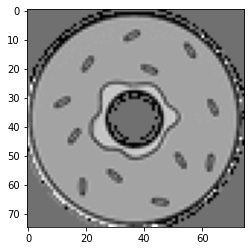

In [8]:
img = cv2.imread("Donut.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.flip(img, 1)
print(img.shape)

import matplotlib.pyplot as plt 
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
game = SnakeGameClass("./Donut.png")
while True:
    success, img = cap.read()
    if success:
        img = cv2.flip(img, 1)
        hands, img = detector.findHands(img)    
        if hands:
            lmList = hands[0]['lmList']
            pointIndex = lmList[8][0:2]
            img = game.update(img, pointIndex)
        cv2.imshow("Image", img)
        key = cv2.waitKey(1)
        if key == ord('r'):
            game.gameOver = False